In [347]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [348]:
# plot 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False,'figure.figsize':(5,15)},
        style='darkgrid')

In [349]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoost
import warnings
warnings.filterwarnings(action='ignore')

In [350]:
# 2015년부터 있는 데이터
df = pd.read_csv('테슬라 총합.csv', index_col=0)

In [351]:
df.columns

Index(['date', 'tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee',
       'oli_price', 'oli_price_volatility', 'carbon_credits',
       'carbon_credits_volatility', 'EVE종가', 'EVE거래량', 'EVE변동률', 'BYD종가',
       'BYD거래량', 'BYD변동률', 'PSI종가', 'PSI거래량', 'SOXX종가', 'SOXX거래량', 'SOXL종가',
       'SOXL거래량', 'LIT조정종가', 'LIT거래량', 'SGL종가', 'SGL변동률', 'li_price', 'co',
       'co_volatility', '희토류가격', 'nasdaq', 'nasdaq_거래량', 'nasdaq_volatility',
       'ssec', 'ssec_거래량', 'ssec_volatility', 'dollar', 'dollar_volatility',
       'alu_price', 'alu_vol', 'alu_change', 'cu_price', 'cu_change',
       'REGI_price', 'REGI_vol', 'REGI_change', 'snp_500',
       'snp_500_volatility'],
      dtype='object')

In [352]:
# 3일 shift
df.tesla = df.tesla.shift(-3)
df.dropna(inplace=True)
df.date = pd.to_datetime(df.date)

In [353]:
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility'], axis=1)

In [354]:
# 75 : 25 비율
x_train, x_test = x.iloc[:1350], x.iloc[1350:]
y_train, y_test = y.iloc[:1350], y.iloc[1350:]

In [355]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [356]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.8733597986176896
lr_test : -2.4928122656119274
rid_train : 0.8726124619715776
rid_test : -2.5943667855515185
las_train : 0.7720369895980269
las_test : -2.6423625153426107
xgb_train : 0.9999563313984102
xgb_test : -4.494306045192062
lgbm_train : 0.9834681259554874
lgbm_test : -4.67367782283847
ela_train : 0.7260072982168077
ela_test : -3.266630558581719


In [357]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.042931
0:	learn: 23.0211217	total: 3.53ms	remaining: 3.53s
1:	learn: 22.2548162	total: 6.43ms	remaining: 3.21s
2:	learn: 21.5380446	total: 9.42ms	remaining: 3.13s
3:	learn: 20.8212013	total: 12.7ms	remaining: 3.16s
4:	learn: 20.1790646	total: 15.7ms	remaining: 3.12s
5:	learn: 19.5302990	total: 18.6ms	remaining: 3.08s
6:	learn: 18.9142069	total: 21.5ms	remaining: 3.05s
7:	learn: 18.3490814	total: 24.4ms	remaining: 3.02s
8:	learn: 17.7935627	total: 27.3ms	remaining: 3s
9:	learn: 17.2809164	total: 30.6ms	remaining: 3.03s
10:	learn: 16.8073203	total: 33.5ms	remaining: 3.01s
11:	learn: 16.3034846	total: 36.4ms	remaining: 2.99s
12:	learn: 15.8206770	total: 39.2ms	remaining: 2.98s
13:	learn: 15.4280224	total: 42.1ms	remaining: 2.97s
14:	learn: 15.0442831	total: 45.1ms	remaining: 2.96s
15:	learn: 14.5983175	total: 48.1ms	remaining: 2.96s
16:	learn: 14.2073465	total: 51ms	remaining: 2.95s
17:	learn: 13.8033637	total: 53.9ms	remaining: 2.94s
18:	learn: 13.4326241	total: 56

179:	learn: 3.9574120	total: 546ms	remaining: 2.49s
180:	learn: 3.9505283	total: 549ms	remaining: 2.48s
181:	learn: 3.9416270	total: 552ms	remaining: 2.48s
182:	learn: 3.9351625	total: 556ms	remaining: 2.48s
183:	learn: 3.9284664	total: 559ms	remaining: 2.48s
184:	learn: 3.9120862	total: 562ms	remaining: 2.48s
185:	learn: 3.8967163	total: 566ms	remaining: 2.48s
186:	learn: 3.8832494	total: 569ms	remaining: 2.48s
187:	learn: 3.8651155	total: 573ms	remaining: 2.47s
188:	learn: 3.8436205	total: 576ms	remaining: 2.47s
189:	learn: 3.8316699	total: 579ms	remaining: 2.47s
190:	learn: 3.8108321	total: 582ms	remaining: 2.46s
191:	learn: 3.8031137	total: 585ms	remaining: 2.46s
192:	learn: 3.7844081	total: 588ms	remaining: 2.46s
193:	learn: 3.7786193	total: 591ms	remaining: 2.45s
194:	learn: 3.7715314	total: 594ms	remaining: 2.45s
195:	learn: 3.7651003	total: 597ms	remaining: 2.45s
196:	learn: 3.7523704	total: 600ms	remaining: 2.44s
197:	learn: 3.7333954	total: 603ms	remaining: 2.44s
198:	learn: 

360:	learn: 2.5134591	total: 1.09s	remaining: 1.92s
361:	learn: 2.5118643	total: 1.09s	remaining: 1.92s
362:	learn: 2.5098368	total: 1.09s	remaining: 1.92s
363:	learn: 2.5034040	total: 1.1s	remaining: 1.92s
364:	learn: 2.5015120	total: 1.1s	remaining: 1.91s
365:	learn: 2.4913427	total: 1.1s	remaining: 1.91s
366:	learn: 2.4863450	total: 1.1s	remaining: 1.91s
367:	learn: 2.4795419	total: 1.11s	remaining: 1.9s
368:	learn: 2.4770106	total: 1.11s	remaining: 1.9s
369:	learn: 2.4700415	total: 1.11s	remaining: 1.9s
370:	learn: 2.4669579	total: 1.12s	remaining: 1.89s
371:	learn: 2.4606369	total: 1.12s	remaining: 1.89s
372:	learn: 2.4539071	total: 1.12s	remaining: 1.89s
373:	learn: 2.4491824	total: 1.13s	remaining: 1.89s
374:	learn: 2.4404947	total: 1.13s	remaining: 1.88s
375:	learn: 2.4354570	total: 1.13s	remaining: 1.88s
376:	learn: 2.4306706	total: 1.14s	remaining: 1.88s
377:	learn: 2.4284447	total: 1.14s	remaining: 1.87s
378:	learn: 2.4259564	total: 1.14s	remaining: 1.87s
379:	learn: 2.42100

539:	learn: 1.7903396	total: 1.63s	remaining: 1.39s
540:	learn: 1.7867469	total: 1.63s	remaining: 1.38s
541:	learn: 1.7840925	total: 1.63s	remaining: 1.38s
542:	learn: 1.7806438	total: 1.64s	remaining: 1.38s
543:	learn: 1.7777711	total: 1.64s	remaining: 1.37s
544:	learn: 1.7747098	total: 1.64s	remaining: 1.37s
545:	learn: 1.7701228	total: 1.65s	remaining: 1.37s
546:	learn: 1.7677201	total: 1.65s	remaining: 1.37s
547:	learn: 1.7646212	total: 1.65s	remaining: 1.36s
548:	learn: 1.7643156	total: 1.66s	remaining: 1.36s
549:	learn: 1.7639970	total: 1.66s	remaining: 1.36s
550:	learn: 1.7611893	total: 1.66s	remaining: 1.35s
551:	learn: 1.7576864	total: 1.66s	remaining: 1.35s
552:	learn: 1.7554933	total: 1.67s	remaining: 1.35s
553:	learn: 1.7528606	total: 1.67s	remaining: 1.34s
554:	learn: 1.7500549	total: 1.67s	remaining: 1.34s
555:	learn: 1.7467366	total: 1.68s	remaining: 1.34s
556:	learn: 1.7429667	total: 1.68s	remaining: 1.33s
557:	learn: 1.7402573	total: 1.68s	remaining: 1.33s
558:	learn: 

715:	learn: 1.3735995	total: 2.17s	remaining: 861ms
716:	learn: 1.3731692	total: 2.17s	remaining: 858ms
717:	learn: 1.3701361	total: 2.18s	remaining: 855ms
718:	learn: 1.3684703	total: 2.18s	remaining: 852ms
719:	learn: 1.3664192	total: 2.18s	remaining: 849ms
720:	learn: 1.3660075	total: 2.19s	remaining: 846ms
721:	learn: 1.3627830	total: 2.19s	remaining: 843ms
722:	learn: 1.3603300	total: 2.19s	remaining: 839ms
723:	learn: 1.3578735	total: 2.19s	remaining: 836ms
724:	learn: 1.3547091	total: 2.2s	remaining: 833ms
725:	learn: 1.3519536	total: 2.2s	remaining: 830ms
726:	learn: 1.3485885	total: 2.2s	remaining: 827ms
727:	learn: 1.3461975	total: 2.21s	remaining: 824ms
728:	learn: 1.3450088	total: 2.21s	remaining: 821ms
729:	learn: 1.3428526	total: 2.21s	remaining: 818ms
730:	learn: 1.3409674	total: 2.21s	remaining: 815ms
731:	learn: 1.3389012	total: 2.22s	remaining: 812ms
732:	learn: 1.3379261	total: 2.22s	remaining: 809ms
733:	learn: 1.3373978	total: 2.22s	remaining: 806ms
734:	learn: 1.3

896:	learn: 1.0389090	total: 2.71s	remaining: 311ms
897:	learn: 1.0371642	total: 2.71s	remaining: 308ms
898:	learn: 1.0360118	total: 2.72s	remaining: 305ms
899:	learn: 1.0341622	total: 2.72s	remaining: 302ms
900:	learn: 1.0320274	total: 2.72s	remaining: 299ms
901:	learn: 1.0304594	total: 2.73s	remaining: 296ms
902:	learn: 1.0302204	total: 2.73s	remaining: 293ms
903:	learn: 1.0297322	total: 2.73s	remaining: 290ms
904:	learn: 1.0281993	total: 2.73s	remaining: 287ms
905:	learn: 1.0270024	total: 2.74s	remaining: 284ms
906:	learn: 1.0247281	total: 2.74s	remaining: 281ms
907:	learn: 1.0229021	total: 2.74s	remaining: 278ms
908:	learn: 1.0218039	total: 2.75s	remaining: 275ms
909:	learn: 1.0212904	total: 2.75s	remaining: 272ms
910:	learn: 1.0197982	total: 2.75s	remaining: 269ms
911:	learn: 1.0170663	total: 2.75s	remaining: 266ms
912:	learn: 1.0150994	total: 2.76s	remaining: 263ms
913:	learn: 1.0138497	total: 2.76s	remaining: 260ms
914:	learn: 1.0122501	total: 2.76s	remaining: 257ms
915:	learn: 

In [358]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.8733597986009745
rid_test : -2.492828230506877
alpha = 0.0005
rid_train : 0.8733597982002421
rid_test : -2.4928920538431574
alpha = 0.001
rid_train : 0.8733597969500501
rid_test : -2.492971751740582
alpha = 0.005
rid_train : 0.8733597573467216
rid_test : -2.493606136638884
alpha = 0.01
rid_train : 0.8733596355382938
rid_test : -2.494391367013098
alpha = 0.05
rid_train : 0.8733560477809772
rid_test : -2.5004050632322112
alpha = 0.1
rid_train : 0.8733459406988358
rid_test : -2.507395943086898
alpha = 0.5
rid_train : 0.8731139220962774
rid_test : -2.552525068134642
alpha = 1
rid_train : 0.8726124619715776
rid_test : -2.5943667855515185
alpha = 5
rid_train : 0.8682697614449024
rid_test : -2.73562605316791
alpha = 10
rid_train : 0.8647996965294121
rid_test : -2.78980626573797
alpha = 100
rid_train : 0.8375404719033218
rid_test : -2.9759875403739824


In [359]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.8731664780000089
las_test : -2.5099658776040092
alpha = 0.0005
las_train : 0.8731777937041199
las_test : -2.51347929099462
alpha = 0.001
las_train : 0.8731885329690223
las_test : -2.5179287403054946
alpha = 0.005
las_train : 0.8732193115834072
las_test : -2.5479557643178365
alpha = 0.01
las_train : 0.8730520970795931
las_test : -2.5875320440099134
alpha = 0.05
las_train : 0.8677891643097908
las_test : -2.8501106737814754
alpha = 0.1
las_train : 0.8607716033830122
las_test : -2.8804763861877754
alpha = 0.5
las_train : 0.8302404362726226
las_test : -2.724338513041468
alpha = 1
las_train : 0.7720369895980269
las_test : -2.6423625153426107
alpha = 5
las_train : 0.5958785686045613
las_test : -3.306828910295093
alpha = 10
las_train : 0.32164849415141217
las_test : -4.482784744711764
alpha = 50
las_train : 0.0
las_test : -5.538743841012944
alpha = 100
las_train : 0.0
las_test : -5.538743841012944
alpha = 500
las_train : 0.0
las_test : -5.538743841012944
alpha = 10

In [360]:
# elastic 계수 바꿔보기
max_score = -99
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 0.01
ratio = 0.9
ela_train : 0.8714444542061524
ela_test : -2.678882086263272


In [361]:
# 2020년 이전의 데이터는 주가가 의미있는 변화가 없기 때문에 머신러닝 모델이 망가짐

In [362]:
plt.figure(figsize=(15,5))
fig = px.line(df, x='date', y=df.tesla, hover_data = {'date':'%Y-%m-%d'})
fig.update_xaxes(dtick='M5')

<Figure size 1080x360 with 0 Axes>

In [363]:
# 2019년부터 있는 데이터
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기(선형 보간법)
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)
df.date = pd.to_datetime(df.date)

In [364]:
plt.figure(figsize=(15,5))
fig = px.line(df, x='date', y=df.tesla, hover_data = {'date':'%Y-%m-%d'})
fig.update_xaxes(dtick='M5')

<Figure size 1080x360 with 0 Axes>

In [365]:
# 상관계수가 0.9이상인 feature
df_corr = df.drop('date',axis=1).corr()[df.drop('date',axis=1).corr().tesla > 0.9]
pd.DataFrame(df_corr.tesla)

,tesla
tesla,1.000000
EVE종가,0.951447
BYD종가,0.956732
DRIV종가,0.957311
kars,0.965680
PSI종가,0.966130
SOXX종가,0.968852
SOXL종가,0.933935
LIT조정종가,0.962468
SGL종가,0.961566


In [366]:
y = df.tesla
x = df.drop(['date', 'tesla', 'elec_fee', 'tesla_volatility'], axis=1)
# 75 : 25 비율
x_train, x_test = x.iloc[:600], x.iloc[600:]
y_train, y_test = y.iloc[:600], y.iloc[600:]

In [367]:
# 스케일링
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [368]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.9940871706206984
lr_test : -11.257749297021373
rid_train : 0.9926603473919922
rid_test : -0.6261940765352161
las_train : 0.9864689105467442
las_test : 0.5738226663334918
xgb_train : 0.999999986537209
xgb_test : -0.5300110824556892
lgbm_train : 0.9997621576177476
lgbm_test : -0.5270712282130705
ela_train : 0.9788430258916874
ela_test : 0.6009720676437412


In [369]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.037768
0:	learn: 249.4592399	total: 5.76ms	remaining: 5.75s
1:	learn: 241.8042924	total: 10.4ms	remaining: 5.2s
2:	learn: 233.9082378	total: 15.8ms	remaining: 5.26s
3:	learn: 226.3663339	total: 21ms	remaining: 5.22s
4:	learn: 218.9294840	total: 25.6ms	remaining: 5.09s
5:	learn: 211.5369139	total: 30.8ms	remaining: 5.1s
6:	learn: 204.7150547	total: 36.1ms	remaining: 5.13s
7:	learn: 198.0196436	total: 40.8ms	remaining: 5.05s
8:	learn: 191.4002140	total: 45.9ms	remaining: 5.06s
9:	learn: 185.2722577	total: 51.2ms	remaining: 5.07s
10:	learn: 179.1050134	total: 56.1ms	remaining: 5.04s
11:	learn: 173.2131822	total: 61ms	remaining: 5.03s
12:	learn: 167.6076469	total: 66.3ms	remaining: 5.04s
13:	learn: 162.2082018	total: 71.2ms	remaining: 5.01s
14:	learn: 157.2366701	total: 76.9ms	remaining: 5.05s
15:	learn: 152.0556517	total: 82ms	remaining: 5.04s
16:	learn: 146.9821003	total: 87.1ms	remaining: 5.04s
17:	learn: 142.1911807	total: 92.3ms	remaining: 5.03s
18:	learn: 137.7

164:	learn: 15.5868647	total: 804ms	remaining: 4.07s
165:	learn: 15.4927867	total: 809ms	remaining: 4.07s
166:	learn: 15.4196439	total: 814ms	remaining: 4.06s
167:	learn: 15.3498234	total: 819ms	remaining: 4.06s
168:	learn: 15.2940777	total: 824ms	remaining: 4.05s
169:	learn: 15.2346301	total: 828ms	remaining: 4.04s
170:	learn: 15.1593381	total: 833ms	remaining: 4.04s
171:	learn: 15.0825793	total: 838ms	remaining: 4.03s
172:	learn: 15.0349409	total: 842ms	remaining: 4.03s
173:	learn: 14.9572185	total: 847ms	remaining: 4.02s
174:	learn: 14.8999231	total: 851ms	remaining: 4.01s
175:	learn: 14.8625004	total: 855ms	remaining: 4s
176:	learn: 14.7574043	total: 860ms	remaining: 4s
177:	learn: 14.7094070	total: 864ms	remaining: 3.99s
178:	learn: 14.6101220	total: 869ms	remaining: 3.99s
179:	learn: 14.5612382	total: 874ms	remaining: 3.98s
180:	learn: 14.5247899	total: 878ms	remaining: 3.97s
181:	learn: 14.4870076	total: 883ms	remaining: 3.97s
182:	learn: 14.4259683	total: 887ms	remaining: 3.96s

331:	learn: 8.4908631	total: 1.65s	remaining: 3.31s
332:	learn: 8.4619257	total: 1.65s	remaining: 3.31s
333:	learn: 8.4497914	total: 1.66s	remaining: 3.3s
334:	learn: 8.4311456	total: 1.66s	remaining: 3.3s
335:	learn: 8.3915798	total: 1.67s	remaining: 3.29s
336:	learn: 8.3593141	total: 1.67s	remaining: 3.29s
337:	learn: 8.3394146	total: 1.68s	remaining: 3.28s
338:	learn: 8.3091807	total: 1.68s	remaining: 3.28s
339:	learn: 8.2628421	total: 1.69s	remaining: 3.27s
340:	learn: 8.2275865	total: 1.69s	remaining: 3.27s
341:	learn: 8.2215868	total: 1.69s	remaining: 3.26s
342:	learn: 8.1872150	total: 1.7s	remaining: 3.26s
343:	learn: 8.1578209	total: 1.7s	remaining: 3.25s
344:	learn: 8.1294934	total: 1.71s	remaining: 3.24s
345:	learn: 8.0917298	total: 1.71s	remaining: 3.24s
346:	learn: 8.0642599	total: 1.72s	remaining: 3.24s
347:	learn: 8.0348834	total: 1.73s	remaining: 3.23s
348:	learn: 8.0156551	total: 1.73s	remaining: 3.23s
349:	learn: 7.9926718	total: 1.74s	remaining: 3.23s
350:	learn: 7.96

492:	learn: 5.3697857	total: 2.44s	remaining: 2.51s
493:	learn: 5.3551984	total: 2.45s	remaining: 2.51s
494:	learn: 5.3514063	total: 2.45s	remaining: 2.5s
495:	learn: 5.3375301	total: 2.46s	remaining: 2.5s
496:	learn: 5.3220548	total: 2.46s	remaining: 2.5s
497:	learn: 5.2996763	total: 2.47s	remaining: 2.49s
498:	learn: 5.2853333	total: 2.48s	remaining: 2.48s
499:	learn: 5.2667513	total: 2.48s	remaining: 2.48s
500:	learn: 5.2472342	total: 2.49s	remaining: 2.48s
501:	learn: 5.2369501	total: 2.49s	remaining: 2.47s
502:	learn: 5.2345174	total: 2.5s	remaining: 2.47s
503:	learn: 5.2102826	total: 2.5s	remaining: 2.46s
504:	learn: 5.1952112	total: 2.51s	remaining: 2.46s
505:	learn: 5.1855845	total: 2.51s	remaining: 2.45s
506:	learn: 5.1831416	total: 2.52s	remaining: 2.45s
507:	learn: 5.1690503	total: 2.52s	remaining: 2.44s
508:	learn: 5.1525528	total: 2.53s	remaining: 2.44s
509:	learn: 5.1359474	total: 2.53s	remaining: 2.43s
510:	learn: 5.1131198	total: 2.54s	remaining: 2.43s
511:	learn: 5.100

663:	learn: 3.4895935	total: 3.28s	remaining: 1.66s
664:	learn: 3.4795802	total: 3.29s	remaining: 1.66s
665:	learn: 3.4705371	total: 3.29s	remaining: 1.65s
666:	learn: 3.4615849	total: 3.3s	remaining: 1.65s
667:	learn: 3.4532479	total: 3.3s	remaining: 1.64s
668:	learn: 3.4409620	total: 3.31s	remaining: 1.64s
669:	learn: 3.4275377	total: 3.31s	remaining: 1.63s
670:	learn: 3.4167247	total: 3.32s	remaining: 1.63s
671:	learn: 3.4043501	total: 3.32s	remaining: 1.62s
672:	learn: 3.3905956	total: 3.33s	remaining: 1.61s
673:	learn: 3.3812645	total: 3.33s	remaining: 1.61s
674:	learn: 3.3781305	total: 3.33s	remaining: 1.6s
675:	learn: 3.3695452	total: 3.34s	remaining: 1.6s
676:	learn: 3.3563765	total: 3.34s	remaining: 1.59s
677:	learn: 3.3440955	total: 3.35s	remaining: 1.59s
678:	learn: 3.3323078	total: 3.35s	remaining: 1.58s
679:	learn: 3.3186667	total: 3.36s	remaining: 1.58s
680:	learn: 3.3023663	total: 3.36s	remaining: 1.58s
681:	learn: 3.2997986	total: 3.37s	remaining: 1.57s
682:	learn: 3.28

822:	learn: 2.3114070	total: 4.09s	remaining: 879ms
823:	learn: 2.3086174	total: 4.09s	remaining: 874ms
824:	learn: 2.3057335	total: 4.1s	remaining: 869ms
825:	learn: 2.3047176	total: 4.1s	remaining: 864ms
826:	learn: 2.3011328	total: 4.11s	remaining: 859ms
827:	learn: 2.2923411	total: 4.11s	remaining: 854ms
828:	learn: 2.2860634	total: 4.12s	remaining: 849ms
829:	learn: 2.2802808	total: 4.12s	remaining: 844ms
830:	learn: 2.2736252	total: 4.13s	remaining: 839ms
831:	learn: 2.2667708	total: 4.13s	remaining: 834ms
832:	learn: 2.2621573	total: 4.14s	remaining: 829ms
833:	learn: 2.2582429	total: 4.14s	remaining: 824ms
834:	learn: 2.2513958	total: 4.14s	remaining: 819ms
835:	learn: 2.2435546	total: 4.15s	remaining: 814ms
836:	learn: 2.2380659	total: 4.16s	remaining: 809ms
837:	learn: 2.2327575	total: 4.16s	remaining: 804ms
838:	learn: 2.2236011	total: 4.16s	remaining: 799ms
839:	learn: 2.2210799	total: 4.17s	remaining: 794ms
840:	learn: 2.2200694	total: 4.17s	remaining: 789ms
841:	learn: 2.

992:	learn: 1.5854703	total: 4.92s	remaining: 34.7ms
993:	learn: 1.5825355	total: 4.93s	remaining: 29.7ms
994:	learn: 1.5777066	total: 4.93s	remaining: 24.8ms
995:	learn: 1.5723516	total: 4.94s	remaining: 19.8ms
996:	learn: 1.5720832	total: 4.94s	remaining: 14.9ms
997:	learn: 1.5665905	total: 4.95s	remaining: 9.91ms
998:	learn: 1.5628110	total: 4.95s	remaining: 4.96ms
999:	learn: 1.5599819	total: 4.96s	remaining: 0us
cat_test : -1.7074513231268225


In [370]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.9940664392797329
rid_test : -0.19312809047702495
alpha = 0.0005
rid_train : 0.9940411821703525
rid_test : -3.1905918841766834
alpha = 0.001
rid_train : 0.9940331472398698
rid_test : -4.356560810349941
alpha = 0.005
rid_train : 0.9940152445388244
rid_test : -4.1324942547223475
alpha = 0.01
rid_train : 0.993999049878949
rid_test : -2.7644389801527285
alpha = 0.05
rid_train : 0.9938931380884796
rid_test : -0.4001323221867654
alpha = 0.1
rid_train : 0.9937912482721057
rid_test : -0.3250453688670305
alpha = 0.5
rid_train : 0.9932077498591285
rid_test : -0.8819016011253324
alpha = 1
rid_train : 0.9926603473919922
rid_test : -0.6261940765352161
alpha = 5
rid_train : 0.9902718585641889
rid_test : 0.44713168072208487
alpha = 10
rid_train : 0.9890060746391265
rid_test : 0.6225068295677335
alpha = 100
rid_train : 0.983791106061209
rid_test : 0.606449713439448


In [371]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 100, 1):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 18.05
rid_train : 0.9879089803086316
rid_test : 0.6555586611522453


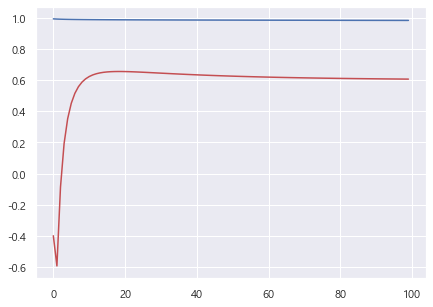

In [372]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [373]:
rid = Ridge(alpha=18.5)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))
rid.coef_

0.9878620968592358
0.6555746643996825


array([  4.95016078, -19.99685188,   3.1967311 ,  -6.83901114,
         0.43129063,   1.93395972,   1.43879374,  -0.70882899,
         8.08024177, -11.25215789,   0.30258262,  19.95646952,
         7.77171652, -21.15049853,   0.53143461,  21.31542194,
         1.29932903,  -2.71251445,  11.0351416 , -10.3045583 ,
         1.33994613,   7.8869427 ,  -3.06844794,  12.50972423,
         1.12523236,  15.91783706,  -0.25595661,  19.49935197,
         7.59699922,  19.68429205,   0.54052345,  -0.53334558,
         6.8335612 ,  -1.92857042,  13.29257536,   5.64847857,
        -1.23193466,   1.10830714,  -6.33988335,   2.05480978,
         0.38247108,  -3.95743635,   1.92929972,  -0.33724606,
        -3.98572146,  -0.69620295,  -8.27461738,  -0.3837603 ,
        19.8703673 ,  -2.92502912,   0.23788417, -12.30040576,
        -0.50467928,  16.34518144,  14.21189024,   0.25972709,
        17.26579176,  -3.12885716,  -0.97441646,  -8.13237758,
         1.59229053,  -2.1500109 ,   5.64061311,   6.41

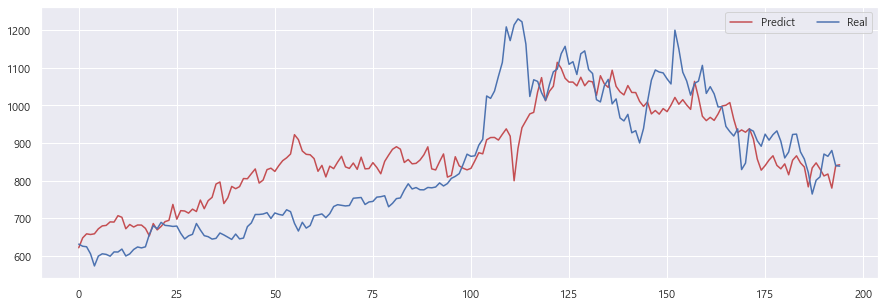

In [374]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [375]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.9931365382251918
las_test : -2.163088196470908
alpha = 0.0005
las_train : 0.99313905809084
las_test : -2.145223515836677
alpha = 0.001
las_train : 0.9931422052884212
las_test : -2.123089874200943
alpha = 0.005
las_train : 0.9931664273208864
las_test : -1.9479431710227337
alpha = 0.01
las_train : 0.993190361751096
las_test : -1.7398900737670697
alpha = 0.05
las_train : 0.9932376153395953
las_test : -0.33719000142862887
alpha = 0.1
las_train : 0.9930012210404835
las_test : 0.21229748582579544
alpha = 0.5
las_train : 0.9888623567036413
las_test : 0.6402516371913111
alpha = 1
las_train : 0.9864689105467442
las_test : 0.5738226663334918
alpha = 5
las_train : 0.9827469169126019
las_test : 0.6060998155826978
alpha = 10
las_train : 0.9807890344090413
las_test : 0.5930650696084843
alpha = 50
las_train : 0.9345888950768786
las_test : 0.5524741640664206
alpha = 100
las_train : 0.8168076500189431
las_test : -0.3066227632564722
alpha = 500
las_train : 0.0
las_test : -11

In [376]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 10, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.35000000000000003
las_train : 0.989869718699241
las_test : 0.6740719298928222


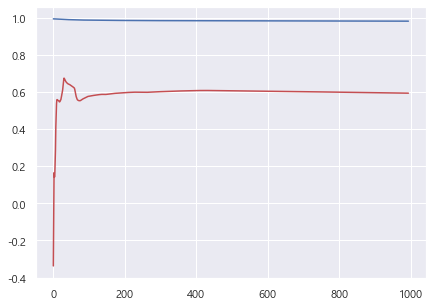

In [377]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [378]:
las = Lasso(alpha=0.35)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([ 4.74295356e+00, -1.05897259e+01,  1.05398468e+00, -2.47006577e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.16876897e+01,  6.79991794e-01,  6.10751509e+01,
        4.79968373e+00, -1.73681118e+01,  1.06512772e+00,  3.16516196e+01,
       -0.00000000e+00, -9.28046579e-01,  2.11686378e+01, -7.51112381e+00,
        0.00000000e+00,  0.00000000e+00, -1.98029307e+00,  0.00000000e+00,
        1.34206578e+00,  7.55300758e+00, -0.00000000e+00,  1.32795015e+01,
        5.28121550e+00,  3.94456866e+00,  2.09116257e-02,  7.99835018e-01,
        0.00000000e+00, -1.23281240e+00,  3.08694946e+00,  0.00000000e+00,
       -1.77460949e+00,  1.29432031e+00, -2.58663102e+00,  4.37454035e+00,
       -0.00000000e+00,  0.00000000e+00,  1.00425841e+00, -3.00441528e+00,
       -3.24435653e+00, -0.00000000e+00, -3.08220010e+01,  0.00000000e+00,
        1.41877141e+00, -2.49335904e+00,  2.01198180e-01, -3.82601233e+01,
        0.00000000e+00,  

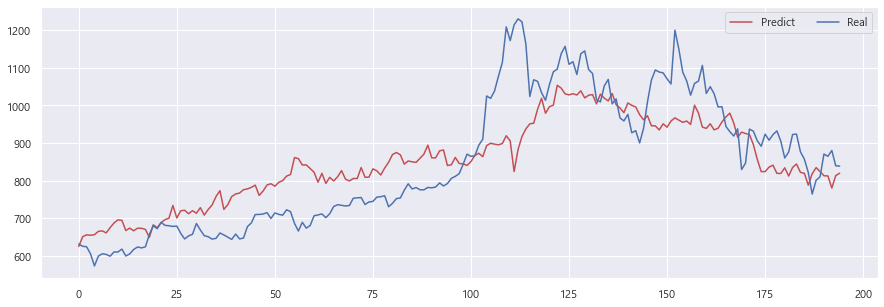

In [379]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [380]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 9.44
ratio = 0.5
ela_train : 0.9471666165941464
ela_test : 0.6890886945389401


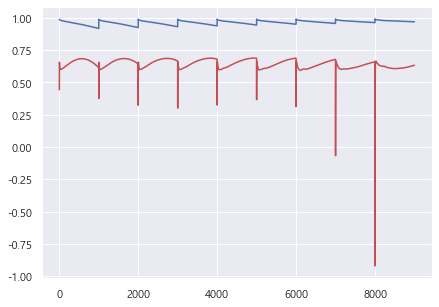

In [381]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [382]:
ela = ElasticNet(l1_ratio=0.5, alpha=9.44)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))
ela.coef_

ela_train : 0.9471666165941464
ela_test : 0.6890886945389401


array([-0.        , -1.24021114,  0.        ,  2.59623771,  0.        ,
        6.74963418, -1.99723053, -0.        ,  7.3050673 ,  4.46885308,
        0.        ,  6.37865772,  5.59916323,  2.09208   ,  2.82643178,
        6.94406381,  3.79081514,  0.        ,  4.39784615,  2.81993457,
        0.        ,  6.43152252,  0.        ,  6.66280868,  0.        ,
        5.93124522, -0.04531099,  7.08740717,  5.27856978,  7.06811226,
        0.        , -0.        ,  2.25174394,  0.        ,  3.03629504,
        6.73909788,  3.91862957,  0.        ,  5.3289249 ,  0.43922419,
        0.        , -6.48616243, -0.        ,  2.81509965, -1.79928061,
        0.        ,  4.32707213,  0.        ,  7.34465881,  1.23351693,
        0.        ,  5.47443599,  0.        ,  6.37893679,  6.58680442,
        0.11033809,  6.42940073,  5.66796415,  0.        , -5.15368298,
        0.25294912,  0.        ,  4.40386353,  5.54622074,  5.17297026,
        6.24534205,  6.61147563,  6.24156896,  7.31334752,  6.71

<AxesSubplot:xlabel='0'>

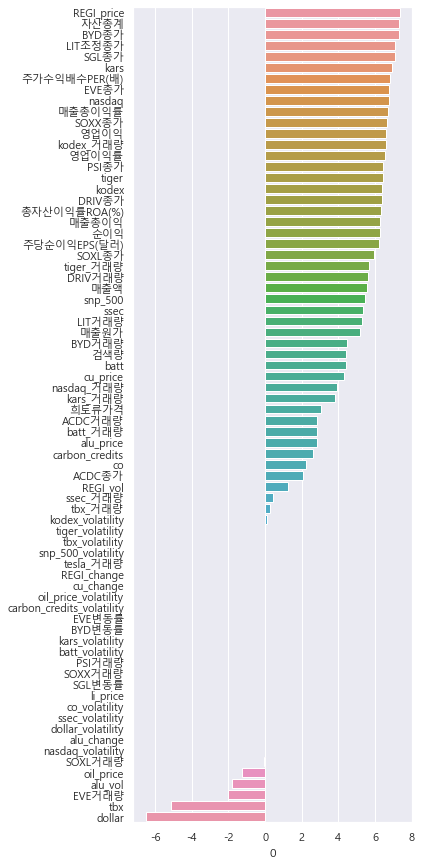

In [383]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
# plot 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False,'figure.figsize':(5,15)},
        style='darkgrid')
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

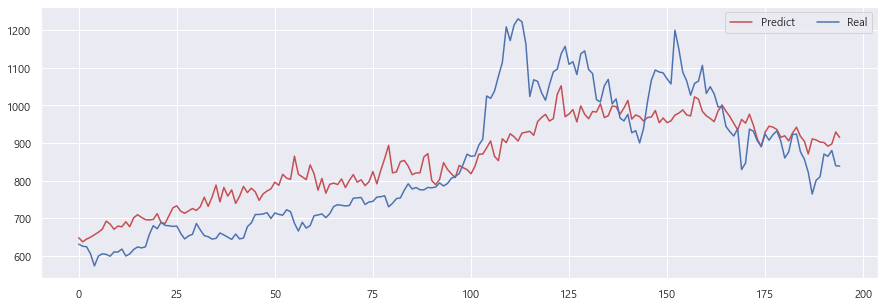

In [384]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [385]:
## 3개의 모델 점수
print('rid_test :', rid.score(x_test_scaled,y_test))
print('las_test :', las.score(x_test_scaled,y_test))
print('ela_test :', ela.score(x_test_scaled,y_test))

rid_test : 0.6555746643996825
las_test : 0.6740719298928252
ela_test : 0.6890886945389401


In [386]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMSE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 102.82603132005258
las RMSE : 100.02680832978459
ela RMSE : 97.69532592404461


In [387]:
# train, test 비율 바꿔보기

In [388]:
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [389]:
y = df.tesla
x = df.drop(['date', 'tesla', 'elec_fee', 'tesla_volatility'], axis=1)

In [390]:
# 70 : 30 비율
x_train, x_test = x.iloc[:560], x.iloc[560:]
y_train, y_test = y.iloc[:560], y.iloc[560:]

In [391]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [392]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 100, 0.01):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 3.0100000000000002
rid_train : 0.9916619884547476
rid_test : 0.1798971504232616


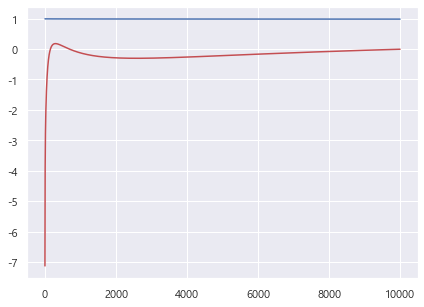

In [393]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [394]:
rid = Ridge(alpha=3.01)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9916619884547476
0.1798971504232616


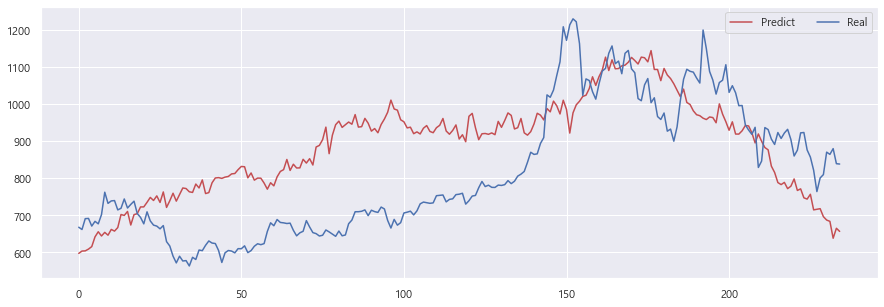

In [395]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [396]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 1, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.18000000000000005
las_train : 0.9917871533164382
las_test : 0.5965966322616085


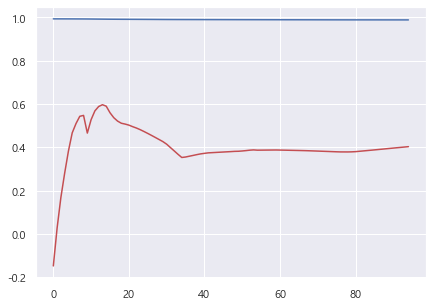

In [397]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [398]:
las = Lasso(alpha=0.18)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)

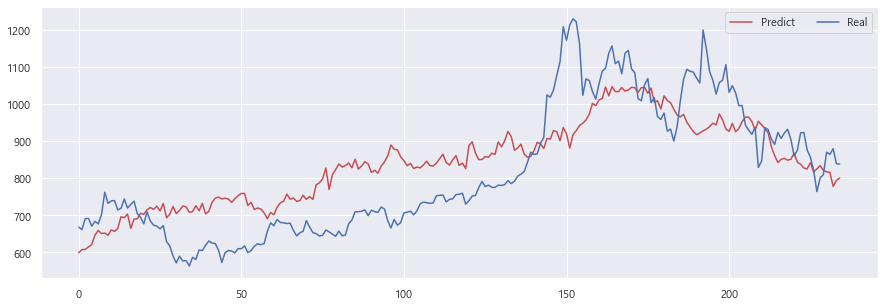

In [399]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [400]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 9.35
ratio = 0.2
ela_train : 0.9288531166680062
ela_test : 0.7085002080649749


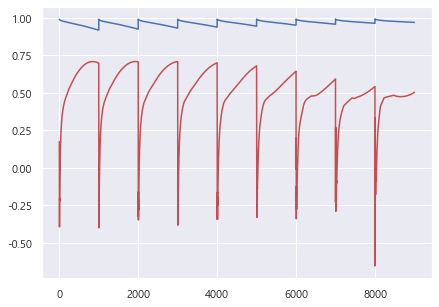

In [401]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [402]:
ela = ElasticNet(l1_ratio=0.2, alpha=9.35)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

ela_train : 0.9288531166680062
ela_test : 0.7085002080649749


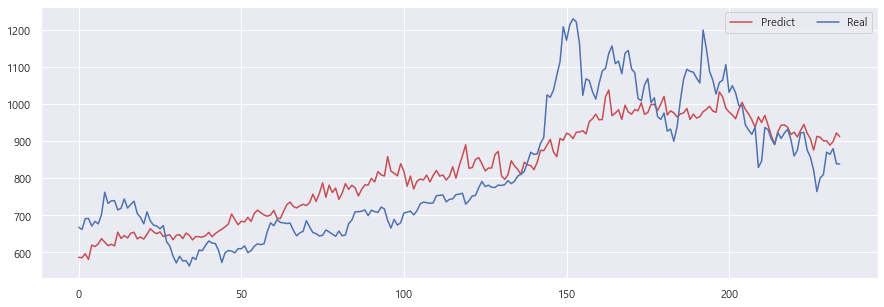

In [403]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [405]:
## 3개의 모델 점수
print('rid_test :', rid.score(x_test_scaled,y_test))
print('las_test :', las.score(x_test_scaled,y_test))
print('ela_test :', ela.score(x_test_scaled,y_test))

rid_test : 0.1798971504232616
las_test : 0.5965966322616103
ela_test : 0.7085002080649749


In [406]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMSE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 158.373385665289
las RMSE : 111.07537812587995
ela RMSE : 94.42068898626852


In [407]:
# feature 조정
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)

In [408]:
# NaN값 채우기
df.interpolate(inplace=True)

In [409]:
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [410]:
# 재무제표 드랍
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility','snp_500', 'snp_500_volatility',
            '매출액', '매출원가', '매출총이익', '영업이익', '순이익', '자산총계', '매출총이익률', '영업이익률',
       '주당순이익EPS(달러)', '주가수익배수PER(배)', '총자산이익률ROA(%)'], axis=1)

In [411]:
# 75 : 25 비율
x_train, x_test = x.iloc[:600], x.iloc[600:]
y_train, y_test = y.iloc[:600], y.iloc[600:]

In [412]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [413]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.9883456426129648
lr_test : 0.06886668075243896
rid_train : 0.9878283318961614
rid_test : 0.41478315583075775
las_train : 0.9849402779754556
las_test : 0.4866420191836899
xgb_train : 0.9999999910992741
xgb_test : -0.6275664544215733
lgbm_train : 0.9997421287978392
lgbm_test : -0.5750975742246558
ela_train : 0.9758727316774767
ela_test : 0.19510390603439687


In [414]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.037768
0:	learn: 248.8303448	total: 5.12ms	remaining: 5.12s
1:	learn: 240.9938252	total: 9.81ms	remaining: 4.89s
2:	learn: 233.8710444	total: 14.4ms	remaining: 4.8s
3:	learn: 226.8142408	total: 18.7ms	remaining: 4.66s
4:	learn: 219.5950161	total: 23.2ms	remaining: 4.61s
5:	learn: 212.7418054	total: 27.5ms	remaining: 4.55s
6:	learn: 205.5303360	total: 31.9ms	remaining: 4.52s
7:	learn: 198.7570409	total: 36.2ms	remaining: 4.49s
8:	learn: 192.3878819	total: 40.8ms	remaining: 4.49s
9:	learn: 186.2223020	total: 45.2ms	remaining: 4.47s
10:	learn: 180.5106562	total: 49.3ms	remaining: 4.44s
11:	learn: 174.9332247	total: 53.2ms	remaining: 4.38s
12:	learn: 169.3106910	total: 57.1ms	remaining: 4.33s
13:	learn: 163.8523937	total: 61.1ms	remaining: 4.3s
14:	learn: 158.9060667	total: 64.9ms	remaining: 4.26s
15:	learn: 153.9242628	total: 68.9ms	remaining: 4.24s
16:	learn: 149.1258779	total: 73.4ms	remaining: 4.25s
17:	learn: 144.6101616	total: 78ms	remaining: 4.25s
18:	learn: 1

168:	learn: 15.4814159	total: 700ms	remaining: 3.44s
169:	learn: 15.4287566	total: 705ms	remaining: 3.44s
170:	learn: 15.3667073	total: 709ms	remaining: 3.44s
171:	learn: 15.3069573	total: 713ms	remaining: 3.43s
172:	learn: 15.2624321	total: 718ms	remaining: 3.43s
173:	learn: 15.2186345	total: 722ms	remaining: 3.43s
174:	learn: 15.1408166	total: 727ms	remaining: 3.43s
175:	learn: 15.0660749	total: 731ms	remaining: 3.42s
176:	learn: 14.9765719	total: 736ms	remaining: 3.42s
177:	learn: 14.9050971	total: 741ms	remaining: 3.42s
178:	learn: 14.8526336	total: 745ms	remaining: 3.42s
179:	learn: 14.7992582	total: 749ms	remaining: 3.41s
180:	learn: 14.6939975	total: 754ms	remaining: 3.41s
181:	learn: 14.6589514	total: 758ms	remaining: 3.4s
182:	learn: 14.5904414	total: 762ms	remaining: 3.4s
183:	learn: 14.5340128	total: 765ms	remaining: 3.39s
184:	learn: 14.4473571	total: 770ms	remaining: 3.39s
185:	learn: 14.4165663	total: 774ms	remaining: 3.38s
186:	learn: 14.3557006	total: 777ms	remaining: 3

346:	learn: 8.0865149	total: 1.43s	remaining: 2.68s
347:	learn: 8.0502195	total: 1.43s	remaining: 2.68s
348:	learn: 8.0086834	total: 1.43s	remaining: 2.67s
349:	learn: 7.9869123	total: 1.44s	remaining: 2.67s
350:	learn: 7.9569781	total: 1.44s	remaining: 2.67s
351:	learn: 7.9326422	total: 1.45s	remaining: 2.66s
352:	learn: 7.9275757	total: 1.45s	remaining: 2.66s
353:	learn: 7.9225418	total: 1.46s	remaining: 2.66s
354:	learn: 7.8994396	total: 1.46s	remaining: 2.65s
355:	learn: 7.8642483	total: 1.46s	remaining: 2.65s
356:	learn: 7.8313942	total: 1.47s	remaining: 2.65s
357:	learn: 7.8128428	total: 1.47s	remaining: 2.64s
358:	learn: 7.7878908	total: 1.48s	remaining: 2.64s
359:	learn: 7.7687475	total: 1.48s	remaining: 2.63s
360:	learn: 7.7497463	total: 1.49s	remaining: 2.63s
361:	learn: 7.7244385	total: 1.49s	remaining: 2.62s
362:	learn: 7.6812910	total: 1.49s	remaining: 2.62s
363:	learn: 7.6562767	total: 1.5s	remaining: 2.62s
364:	learn: 7.6289240	total: 1.5s	remaining: 2.61s
365:	learn: 7.

519:	learn: 5.0843949	total: 2.15s	remaining: 1.99s
520:	learn: 5.0673434	total: 2.16s	remaining: 1.99s
521:	learn: 5.0544402	total: 2.16s	remaining: 1.98s
522:	learn: 5.0452311	total: 2.17s	remaining: 1.98s
523:	learn: 5.0286007	total: 2.17s	remaining: 1.97s
524:	learn: 5.0255387	total: 2.18s	remaining: 1.97s
525:	learn: 5.0063403	total: 2.18s	remaining: 1.97s
526:	learn: 4.9893065	total: 2.19s	remaining: 1.96s
527:	learn: 4.9812316	total: 2.19s	remaining: 1.96s
528:	learn: 4.9599426	total: 2.19s	remaining: 1.95s
529:	learn: 4.9494665	total: 2.2s	remaining: 1.95s
530:	learn: 4.9301305	total: 2.2s	remaining: 1.95s
531:	learn: 4.9088547	total: 2.21s	remaining: 1.94s
532:	learn: 4.8927111	total: 2.21s	remaining: 1.94s
533:	learn: 4.8765067	total: 2.21s	remaining: 1.93s
534:	learn: 4.8616386	total: 2.22s	remaining: 1.93s
535:	learn: 4.8582283	total: 2.22s	remaining: 1.92s
536:	learn: 4.8530900	total: 2.23s	remaining: 1.92s
537:	learn: 4.8338803	total: 2.23s	remaining: 1.91s
538:	learn: 4.

693:	learn: 3.3183737	total: 2.88s	remaining: 1.27s
694:	learn: 3.3097400	total: 2.88s	remaining: 1.26s
695:	learn: 3.3022935	total: 2.89s	remaining: 1.26s
696:	learn: 3.2902978	total: 2.89s	remaining: 1.26s
697:	learn: 3.2889379	total: 2.9s	remaining: 1.25s
698:	learn: 3.2802927	total: 2.9s	remaining: 1.25s
699:	learn: 3.2794486	total: 2.9s	remaining: 1.24s
700:	learn: 3.2654938	total: 2.91s	remaining: 1.24s
701:	learn: 3.2639092	total: 2.91s	remaining: 1.24s
702:	learn: 3.2539356	total: 2.92s	remaining: 1.23s
703:	learn: 3.2431397	total: 2.92s	remaining: 1.23s
704:	learn: 3.2335448	total: 2.92s	remaining: 1.22s
705:	learn: 3.2189336	total: 2.93s	remaining: 1.22s
706:	learn: 3.2072103	total: 2.93s	remaining: 1.21s
707:	learn: 3.2038799	total: 2.93s	remaining: 1.21s
708:	learn: 3.1958684	total: 2.94s	remaining: 1.21s
709:	learn: 3.1886877	total: 2.94s	remaining: 1.2s
710:	learn: 3.1812011	total: 2.95s	remaining: 1.2s
711:	learn: 3.1722676	total: 2.95s	remaining: 1.19s
712:	learn: 3.161

876:	learn: 2.0943569	total: 3.6s	remaining: 505ms
877:	learn: 2.0846845	total: 3.61s	remaining: 501ms
878:	learn: 2.0735548	total: 3.61s	remaining: 497ms
879:	learn: 2.0686108	total: 3.62s	remaining: 493ms
880:	learn: 2.0638703	total: 3.62s	remaining: 489ms
881:	learn: 2.0591593	total: 3.63s	remaining: 485ms
882:	learn: 2.0549088	total: 3.63s	remaining: 481ms
883:	learn: 2.0503042	total: 3.63s	remaining: 477ms
884:	learn: 2.0430345	total: 3.64s	remaining: 473ms
885:	learn: 2.0390311	total: 3.64s	remaining: 469ms
886:	learn: 2.0382508	total: 3.65s	remaining: 465ms
887:	learn: 2.0314992	total: 3.65s	remaining: 461ms
888:	learn: 2.0278139	total: 3.65s	remaining: 456ms
889:	learn: 2.0225516	total: 3.66s	remaining: 452ms
890:	learn: 2.0216036	total: 3.66s	remaining: 448ms
891:	learn: 2.0169623	total: 3.67s	remaining: 444ms
892:	learn: 2.0120683	total: 3.67s	remaining: 440ms
893:	learn: 2.0072484	total: 3.67s	remaining: 436ms
894:	learn: 2.0050367	total: 3.68s	remaining: 432ms
895:	learn: 1

In [415]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.988345642559713
rid_test : 0.06920582558712529
alpha = 0.0005
rid_train : 0.9883456412869752
rid_test : 0.07055679446472551
alpha = 0.001
rid_train : 0.9883456373351989
rid_test : 0.07223299633961366
alpha = 0.005
rid_train : 0.9883455156051374
rid_test : 0.08516348341298885
alpha = 0.01
rid_train : 0.9883451566417788
rid_test : 0.10022178429019368
alpha = 0.05
rid_train : 0.9883364140538646
rid_test : 0.1892921726276685
alpha = 0.1
rid_train : 0.9883167699134586
rid_test : 0.2548682674745725
alpha = 0.5
rid_train : 0.9880907825145256
rid_test : 0.38261155010126413
alpha = 1
rid_train : 0.9878283318961614
rid_test : 0.41478315583075775
alpha = 5
rid_train : 0.9867883685454407
rid_test : 0.4789735996971777
alpha = 10
rid_train : 0.9861958498376213
rid_test : 0.48584685214454637
alpha = 100
rid_train : 0.9818340910281516
rid_test : 0.311183593068183


In [416]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 10, 0.01):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 8.750000000000002
rid_train : 0.9863202128996943
rid_test : 0.48633054941630305


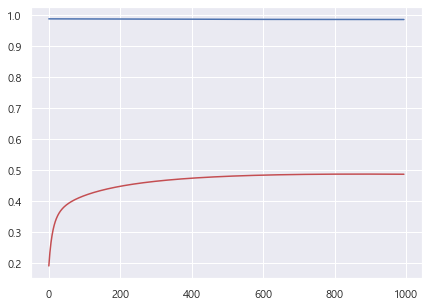

In [417]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [418]:
rid = Ridge(alpha=8.75)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9863202128996943
0.48633054941630305


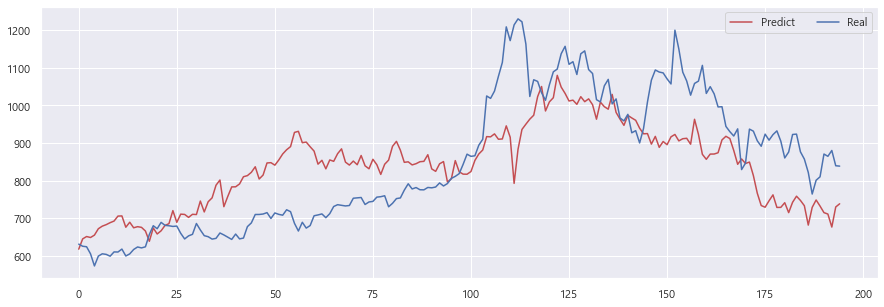

In [419]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [420]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.9880560792250003
las_test : 0.1834998128404305
alpha = 0.0005
las_train : 0.9880583322523542
las_test : 0.18638684791746662
alpha = 0.001
las_train : 0.9880611099139198
las_test : 0.1899246090275687
alpha = 0.005
las_train : 0.988081767158997
las_test : 0.21555313345583893
alpha = 0.01
las_train : 0.9881034249631966
las_test : 0.24982949679783595
alpha = 0.05
las_train : 0.9880613510004338
las_test : 0.37950578371345833
alpha = 0.1
las_train : 0.987762160863312
las_test : 0.4417364075232859
alpha = 0.5
las_train : 0.9859752291708443
las_test : 0.5101336906428149
alpha = 1
las_train : 0.9849402779754556
las_test : 0.4866420191836899
alpha = 5
las_train : 0.9784014794295299
las_test : 0.37955588495680903
alpha = 10
las_train : 0.9750675499049379
las_test : 0.3564547772223584
alpha = 50
las_train : 0.9258818655471847
las_test : 0.4072810512483763
alpha = 100
las_train : 0.8067173954388022
las_test : -0.41552099195551784
alpha = 500
las_train : 0.0
las_test : -

In [421]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 1, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.31000000000000005
las_train : 0.9865850800655864
las_test : 0.513392224229129


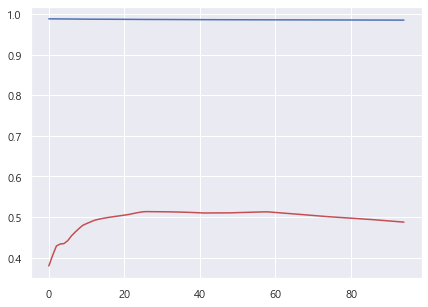

In [422]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [423]:
las = Lasso(alpha=0.31)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([ 2.36849968e+00, -3.29873186e+01,  6.49409935e+00, -6.55383559e+00,
        0.00000000e+00, -1.24670917e+01,  5.84470765e-01, -3.61877706e-01,
        0.00000000e+00, -1.08329395e+01, -0.00000000e+00,  0.00000000e+00,
        3.88646004e+00, -3.35866480e+01,  2.23942014e+00,  9.12265305e+01,
        6.52347501e-02, -1.17417337e+00, -0.00000000e+00, -8.06747146e+00,
        0.00000000e+00, -0.00000000e+00, -1.81585406e+00,  0.00000000e+00,
        5.90044229e-01, -0.00000000e+00,  0.00000000e+00,  8.84961864e+01,
        4.92808361e+00,  1.39811747e+01, -0.00000000e+00,  0.00000000e+00,
        1.28320344e+01, -1.91835639e+00,  2.40800378e+01,  0.00000000e+00,
       -1.28258441e+00,  0.00000000e+00, -0.00000000e+00, -2.46959807e+00,
       -0.00000000e+00, -8.75312819e+00,  2.89892433e+00,  0.00000000e+00,
       -9.80925545e+00, -3.65592528e-01,  0.00000000e+00, -1.32660268e+00,
        2.73857387e+01, -1.15123167e+00, -1.49303150e-02,  0.00000000e+00,
        7.29985705e+00, -

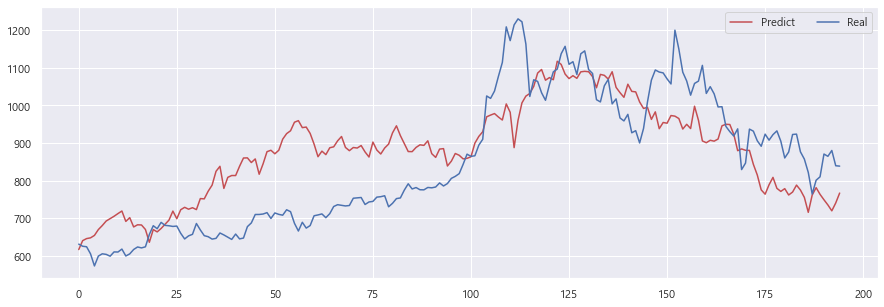

In [424]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [425]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 0.05
ratio = 0.8
ela_train : 0.9865732574937612
ela_test : 0.5270784317717834


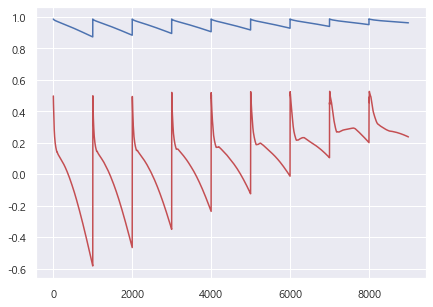

In [426]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [427]:
ela = ElasticNet(l1_ratio=0.8, alpha=0.05)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

ela_train : 0.9865732574937612
ela_test : 0.5270784317717834


In [428]:
ela.coef_

array([  3.27696012, -29.36131208,   5.92456033, -10.07266328,
         0.25798468, -14.33366867,   1.41156072,  -0.62141205,
        14.11620952, -12.30862397,   0.16734879,  28.3660336 ,
         4.92723801, -31.01285018,   1.78119678,  40.80065596,
         1.58422952,  -1.85382402,  -3.12407907, -10.17991124,
         2.56951974,   4.58258343,  -2.85662034,  25.38317705,
         0.48533205,  -6.86129594,   0.46602527,  41.1187995 ,
         7.30090653,  37.28844011,  -0.34795502,  -0.        ,
        11.55212666,  -2.41775274,  20.69729454,   3.79121876,
        -1.26638246,  -0.11658116,  -1.56997563,  -1.11666208,
         0.11489491, -12.30571017,   3.21685051,   0.20923727,
        -9.95611955,  -0.34525135,   0.        ,  -1.38282255,
        27.44859625,  -2.28540431,  -0.41242069,  18.94388147,
        11.38254663,   0.        ,  25.18086964,  -4.69900437,
        -1.05377199, -19.6885694 ,   1.65008029,  -1.94421618,
         5.30020395])

<AxesSubplot:xlabel='0'>

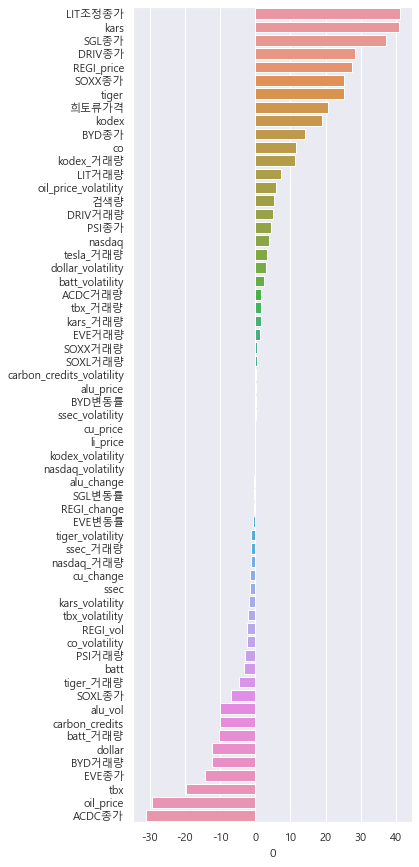

In [429]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
# plot 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False,'figure.figsize':(5,15)},
        style='darkgrid')
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

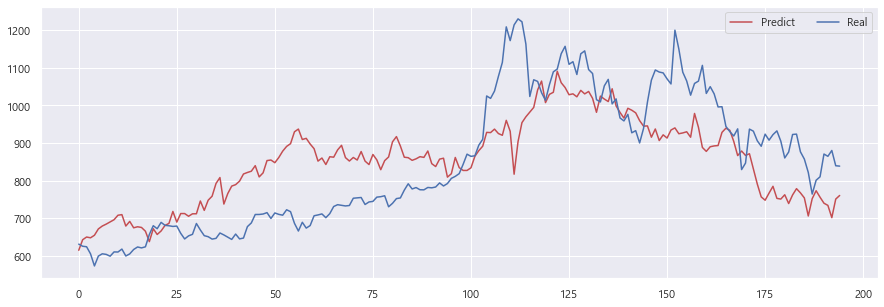

In [430]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [432]:
## 3개의 모델 점수
print('rid_test :', rid.score(x_test_scaled,y_test))
print('las_test :', las.score(x_test_scaled,y_test))
print('ela_test :', ela.score(x_test_scaled,y_test))

rid_test : 0.48633054941630305
las_test : 0.513392224229129
ela_test : 0.5270784317717834


In [433]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMAE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 125.5733261339922
las RMSE : 122.22078004880919
ela RMAE : 120.48974617065755


In [434]:
# train, test 비율 바꿔보기

In [461]:
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [462]:
# 재무제표 드랍
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility','snp_500', 'snp_500_volatility',
            '매출액', '매출원가', '매출총이익', '영업이익', '순이익', '자산총계', '매출총이익률', '영업이익률',
       '주당순이익EPS(달러)', '주가수익배수PER(배)', '총자산이익률ROA(%)'], axis=1)

In [463]:
# 70 : 30 비율
x_train, x_test = x.iloc[:560], x.iloc[560:]
y_train, y_test = y.iloc[:560], y.iloc[560:]

In [464]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [465]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 1000, 1):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 34.05
rid_train : 0.9857537885350844
rid_test : 0.4711957333630834


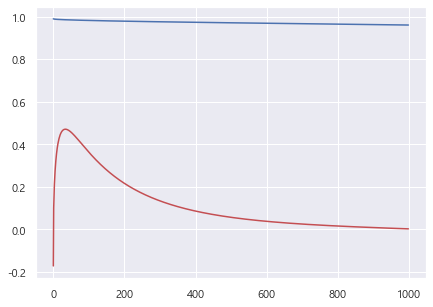

In [466]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [467]:
rid = Ridge(alpha=34.05)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9857537885350844
0.4711957333630834


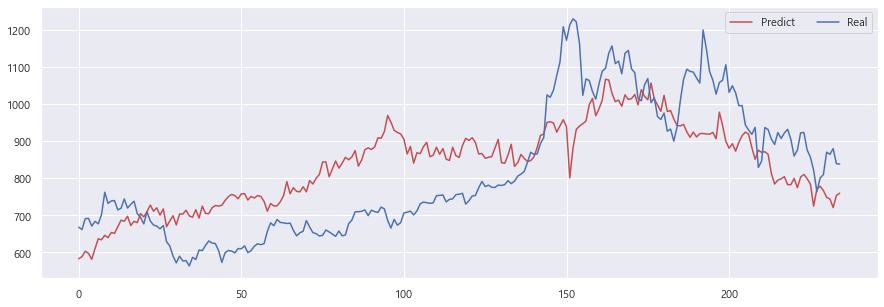

In [468]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [443]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 100, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 43.400000000000006
las_train : 0.9297101754315596
las_test : 0.4952414817276226


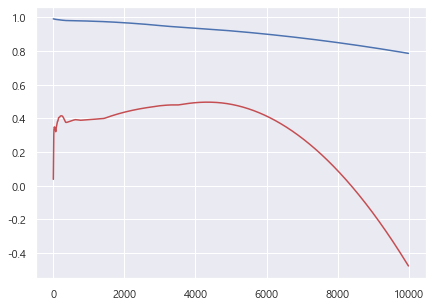

In [444]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [445]:
las = Lasso(alpha=43.4)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
       51.53113087, -0.        , -0.        ,  1.365425  ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 45.17081276,  0.        , 54.23196526,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       44.64869891,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ])

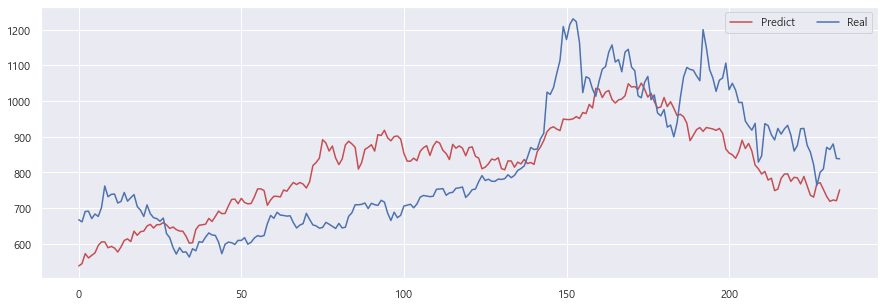

In [446]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [447]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 0.61
ratio = 0.9
ela_train : 0.9845276847246774
ela_test : 0.5422393228223704


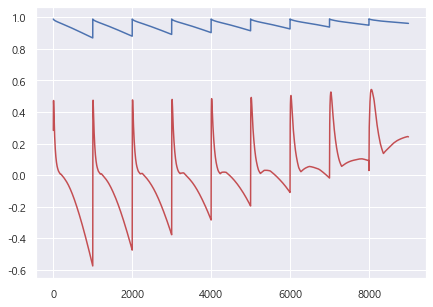

In [448]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [449]:
ela = ElasticNet(l1_ratio=0.9, alpha=0.61)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

ela_train : 0.9845276847246774
ela_test : 0.5422393228223704


<AxesSubplot:xlabel='0'>

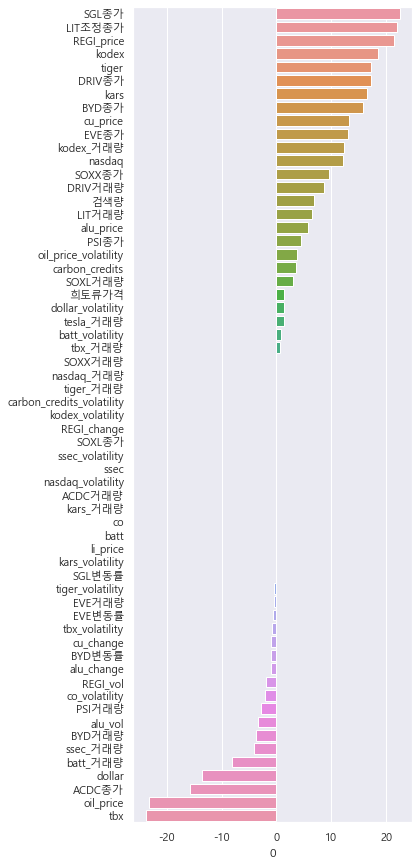

In [450]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
# plot 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False,'figure.figsize':(5,15)},
        style='darkgrid')
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

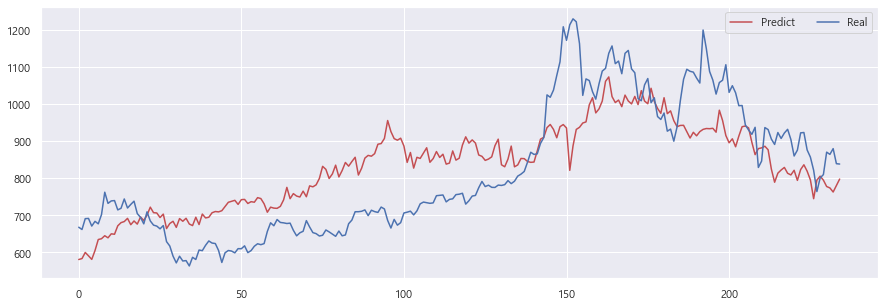

In [451]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [452]:
## 3개의 모델 점수
print('rid_test :', rid.score(x_test_scaled,y_test))
print('las_test :', las.score(x_test_scaled,y_test))
print('ela_test :', ela.score(x_test_scaled,y_test))

rid_test : 0.4711957333630834
las_test : 0.49524148172762283
ela_test : 0.5422393228223704


In [453]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMSE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 127.17317555131326
las RMSE : 124.24813226062297
ela RMSE : 118.3224849866139


In [454]:
from itertools import combinations

In [455]:
# 10개의 무작위 column 조합
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [456]:
cols = df.columns.to_list()
cols = cols[5:]

In [ ]:
max_score = -99
max_alpha = 0
train_score = 0
max_col = []
for combi in combinations(cols, 10):
    col = list(combi)
    y = df.tesla
    x = df[col]
    # 70 : 30 비율
    x_train, x_test = x.iloc[:560], x.iloc[560:]
    y_train, y_test = y.iloc[:560], y.iloc[560:]
    scaled = StandardScaler()
    scaled.fit(x_train)
    x_train_scaled = scaled.transform(x_train)
    x_test_scaled = scaled.transform(x_test)
    for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
        rid = Ridge(alpha=i)
        rid.fit(x_train_scaled, y_train)
        preds_rid = rid.predict(x_test_scaled)
        if max_score < rid.score(x_test_scaled,y_test):
            max_score = rid.score(x_test_scaled,y_test)
            max_alpha = i
            max_col = col
            train_score = rid.score(x_train_scaled,y_train)

In [457]:
print(max_col)
print(max_alpha)
print(max_score)
print(train_score)

['oil_price', 'oil_price_volatility', 'carbon_credits', 'carbon_credits_volatility', 'EVE종가', 'EVE거래량', 'EVE변동률', 'BYD종가', 'kars', 'SOXL종가']
0.61
0.5422393228223704
0.9845276847246774


In [458]:
y = df.tesla
x = df[['oil_price', 'oil_price_volatility', 'carbon_credits', 'carbon_credits_volatility', 'EVE종가',
        'EVE거래량', 'EVE변동률', 'kars', 'li_price', '주가수익배수PER(배)']]
# 75 : 25 비율
x_train, x_test = x.iloc[:560], x.iloc[560:]
y_train, y_test = y.iloc[:560], y.iloc[560:]
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)
rid = Ridge(alpha=10)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9717182502965156
0.7337413309503711


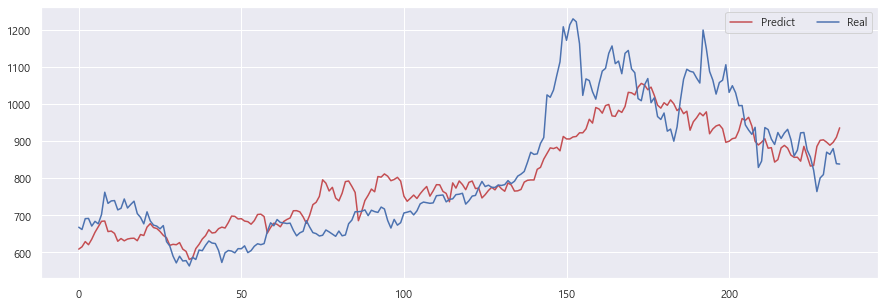

In [459]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [460]:
print('rid test score :', rid.score(x_test_scaled,y_test))
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)

rid test score : 0.7337413309503711
rid RMSE : 90.24017294719552
